## Data Collection

#### Importing Libraries

In [2]:
#Data Manipulations, Analysis and Visualiasations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#modules for machine learning model building, evaluation, and data preprocessing

from sklearn.model_selection import train_test_split      #splitting data
from sklearn.preprocessing import LabelEncoder            #Encode catagorical variables
from sklearn.ensemble import RandomForestClassifier                # Random Forest model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix     #model evaluation
from sklearn.metrics import roc_auc_score    #evaluate the model's performance
from sklearn.metrics import roc_curve       #to plot roc curve
from imblearn.over_sampling import SMOTE    #for upsampling imbalanced variable

#### Loading Dataset

In [4]:
data = pd.read_csv("D:\Assignment\Fraud.csv")

#### Exploring Dataset

In [5]:
data.shape

(6362620, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


#### Changing datatype to reduce memory usage

In [8]:
#Convert float64 to float 32 and int64 to int8
data['step'] = data['step'].astype(np.int16)
data['isFraud'] = data['isFraud'].astype(np.int8)
data['isFlaggedFraud'] = data['isFlaggedFraud'].astype(np.int8)
data['amount'] = data['amount'].astype(np.float32)
data['oldbalanceOrg'] = data['oldbalanceOrg'].astype(np.float32)
data['newbalanceOrig'] = data['newbalanceOrig'].astype(np.float32)
data['oldbalanceDest'] = data['oldbalanceDest'].astype(np.float32)
data['newbalanceDest'] = data['newbalanceDest'].astype(np.float32)
# Convert 'type' to category
data['type'] = data['type'].astype('category')

## Data Cleaning

#### Handling Missing Values and Duplicates

In [14]:
#Checking for missing values
print("Missing value sum")
print(data.isnull().sum())  

#Checking for Duplicates
print("Duplicate sum")
print(data.duplicated().sum()) 

Missing value sum
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
Duplicate sum
0


No missing values and duplicates

In [22]:
fraud_data = data[data['isFraud'] == 1]
fraud_data.shape

(8213, 11)

#### Handling Outliers 

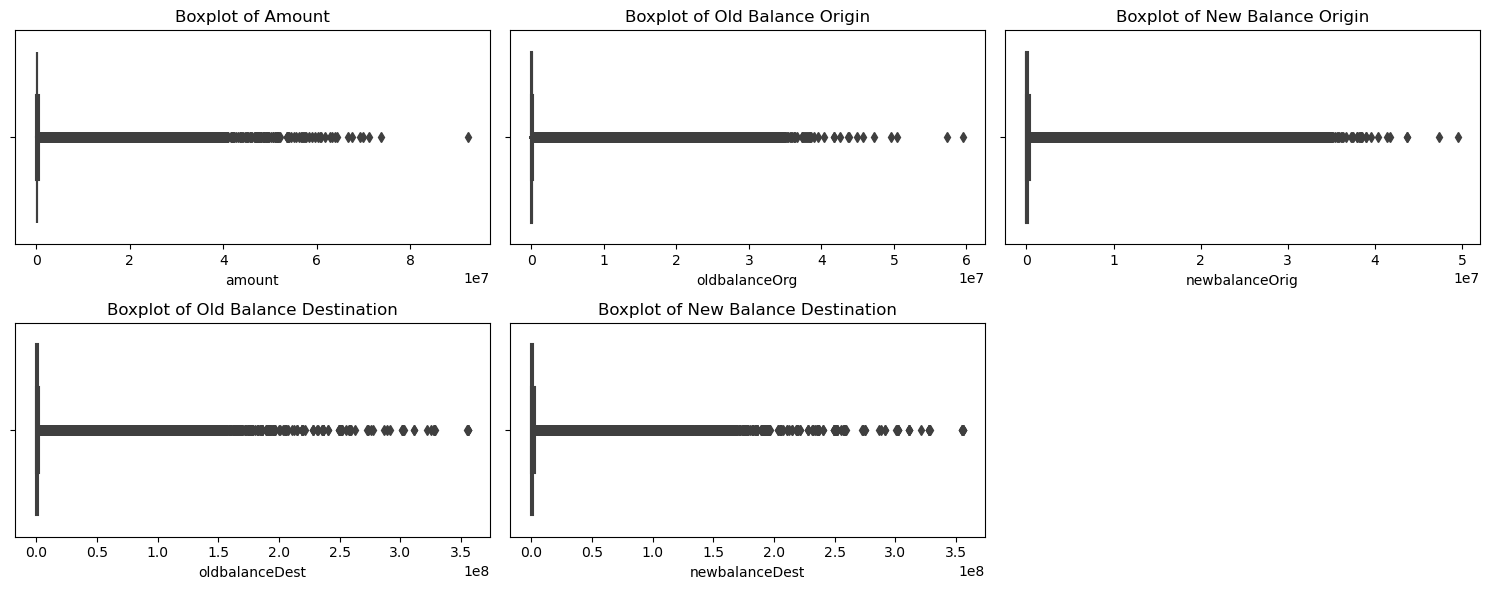

In [16]:
#Visualising outliers
plt.figure(figsize=(15, 6))

# Boxplot for 'amount'
plt.subplot(2, 3, 1)
sns.boxplot(x='amount', data=data)
plt.title('Boxplot of Amount')

# Boxplot for 'oldbalanceOrg'
plt.subplot(2, 3, 2)
sns.boxplot(x='oldbalanceOrg', data=data)
plt.title('Boxplot of Old Balance Origin')

# Boxplot for 'newbalanceOrig'
plt.subplot(2, 3, 3)
sns.boxplot(x='newbalanceOrig', data=data)
plt.title('Boxplot of New Balance Origin')

# Boxplot for 'oldbalanceDest'
plt.subplot(2, 3, 4)
sns.boxplot(x='oldbalanceDest', data=data)
plt.title('Boxplot of Old Balance Destination')

# Boxplot for 'newbalanceDest'
plt.subplot(2, 3, 5)
sns.boxplot(x='newbalanceDest', data=data)
plt.title('Boxplot of New Balance Destination')

# Display the plot
plt.tight_layout()  # To ensure no overlap between subplots
plt.show()


In [26]:
#Checking outliers

non_fraud= data[data['isFraud'] == 0] 
# For 'amount'
Q1a = non_fraud['amount'].quantile(0.25)
Q3a = non_fraud['amount'].quantile(0.75)
IQRa = Q3a - Q1a
lower_bounda = Q1a - 1.5 * IQRa
upper_bounda = Q3a + 1.5 * IQRa
outliers1 = non_fraud[(non_fraud['amount'] < lower_bounda) | (non_fraud['amount'] > upper_bounda)]
print("No of outliers in amount:")
print(outliers1.shape)

# For 'oldbalanceOrg'
Q1b = non_fraud['oldbalanceOrg'].quantile(0.25)
Q3b = non_fraud['oldbalanceOrg'].quantile(0.75)
IQRb = Q3b - Q1b
lower_boundb = Q1b - 1.5 * IQRb
upper_boundb = Q3b + 1.5 * IQRb
outliers2 = non_fraud[(non_fraud['oldbalanceOrg'] < lower_boundb) | (non_fraud['oldbalanceOrg'] > upper_boundb)]
print("No of outliers in old balance org:")
print(outliers2.shape)

# For 'newbalanceOrig'
Q1c = non_fraud['newbalanceOrig'].quantile(0.25)
Q3c = non_fraud['newbalanceOrig'].quantile(0.75)
IQRc = Q3c - Q1c
lower_boundc = Q1c - 1.5 * IQRc
upper_boundc = Q3c + 1.5 * IQRc
outliers3 = non_fraud[(non_fraud['newbalanceOrig'] < lower_boundc) | (non_fraud['newbalanceOrig'] > upper_boundc)]
print("No of outliers in new balance orig:")
print(outliers3.shape)

# For 'oldbalanceDest'
Q1d = non_fraud['oldbalanceDest'].quantile(0.25)
Q3d = non_fraud['oldbalanceDest'].quantile(0.75)
IQRd = Q3d - Q1d
lower_boundd = Q1d - 1.5 * IQRd
upper_boundd = Q3d + 1.5 * IQRd
outliers4 = non_fraud[(non_fraud['oldbalanceDest'] < lower_boundd) | (non_fraud['oldbalanceDest'] > upper_boundd)]
print("No of outliers in old balance dest:")
print(outliers4.shape)

# For 'newbalanceDest'
Q1e = non_fraud['newbalanceDest'].quantile(0.25)
Q3e = non_fraud['newbalanceDest'].quantile(0.75)
IQRe = Q3e - Q1e
lower_bounde = Q1e - 1.5 * IQRe
upper_bounde = Q3e + 1.5 * IQRe
outliers5 = non_fraud[(non_fraud['newbalanceDest'] < lower_bounde) | (non_fraud['newbalanceDest'] > upper_bounde)]
print("No of outliers in new balance dest:")
print(outliers5.shape)

No of outliers in amount:
(335347, 11)
No of outliers in old balance org:
(1108804, 11)
No of outliers in new balance orig:
(1051582, 11)
No of outliers in old balance dest:
(784782, 11)
No of outliers in new balance dest:
(737381, 11)


In [27]:
# Removing outliers
no_outliers = non_fraud[
    (non_fraud['amount'] >= lower_bounda) & (non_fraud['amount'] <= upper_bounda) &
    (non_fraud['oldbalanceOrg'] >= lower_boundb) & (non_fraud['oldbalanceOrg'] <= upper_boundb) &
    (non_fraud['newbalanceOrig'] >= lower_boundc) & (non_fraud['newbalanceOrig'] <= upper_boundc) &
    (non_fraud['oldbalanceDest'] >= lower_boundd) & (non_fraud['oldbalanceDest'] <= upper_boundd) &
    (non_fraud['newbalanceDest'] >= lower_bounde) & (non_fraud['newbalanceDest'] <= upper_bounde)
]
print(no_outliers.shape)

(4389737, 11)


#### separating numerical Variables

In [30]:

numerical_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest','newbalanceDest']
joined= pd.concat([no_outliers,fraud_data], axis=0, ignore_index=True)
nums= joined[numerical_cols]
nums.shape

(4397950, 5)

#### Handling Multi-collinearity

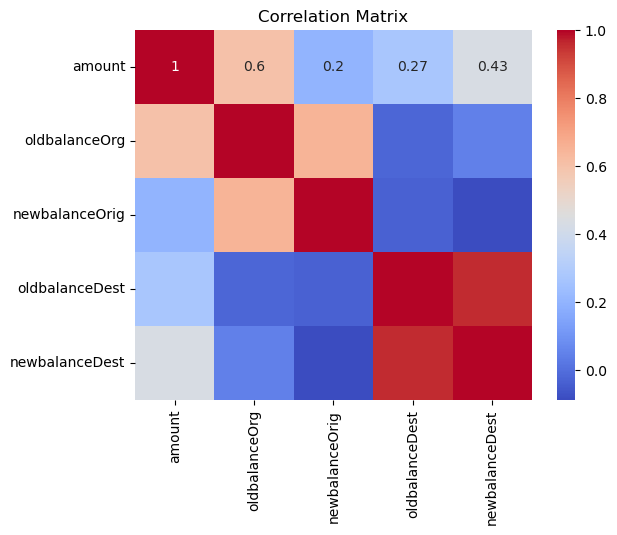

          feature        VIF
0           const   1.691181
1          amount   3.176106
2   oldbalanceOrg   3.082289
3  newbalanceOrig   2.232344
4  oldbalanceDest  24.347925
5  newbalanceDest  28.420750


In [32]:
#Correlation
sns.heatmap(nums.corr(),annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()                       

#VIF values
X = nums
X_with_const = add_constant(X)

vif_data = pd.DataFrame()
vif_data["feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

print(vif_data)

 old balance dest and new balance dest are highly correlated and have vif value>10.

In [33]:
#Removing one of the coloumn with multi-collinearity 
nums=nums.drop(columns=['newbalanceDest'])
joined=joined.drop(columns=['newbalanceDest'])

## Exploratory Data Analysis

#### Count of Transaction Method

Count of Transaction Method
type
PAYMENT     1996563
CASH_OUT    1743778
CASH_IN      412671
TRANSFER     212305
DEBIT         32633
Name: count, dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


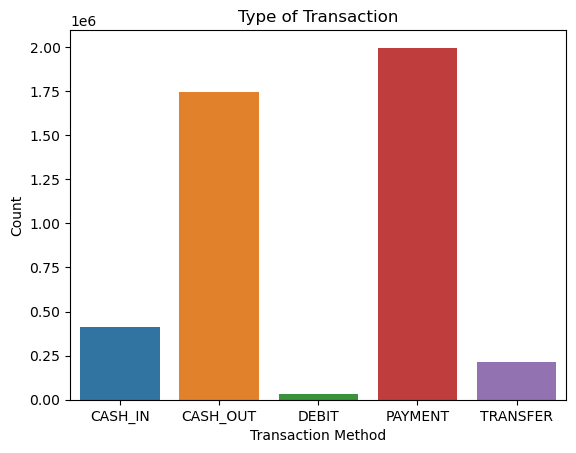

In [69]:
print("Count of Transaction Method")
print(joined['type'].value_counts())
sns.countplot(x='type', data=joined)
plt.title('Type of Transaction')
plt.xlabel('Transaction Method')
plt.ylabel('Count')
plt.show()

#### Count of Fraud Transactions

Count of Fraud
isFraud
0    4389737
1       8213
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x1936d83fed0>,
 [Text(-1.0999810691588847, 0.006453486815439299, ''),
  Text(1.09998106891342, -0.006453528654175899, '')],
 [Text(-0.5999896740866644, 0.003520083717512344, '99.81%'),
  Text(0.5999896739527745, -0.003520106538641399, '0.19%')])

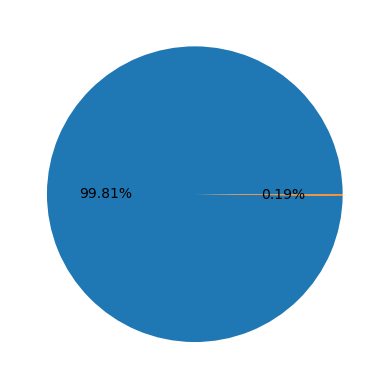

In [71]:
print("Count of Fraud")
print(joined['isFraud'].value_counts())
plt.pie(joined['isFraud'].value_counts(),autopct='%.2f%%')

Only 0.19% are fraud. Target variable is highly imbalanced.

#### Distribution of Fraud Transaction Throughout The Day

Count of Transaction Method
time
NIGHT    2682
NOON     2081
MORN     1747
EVEN     1703
Name: count, dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


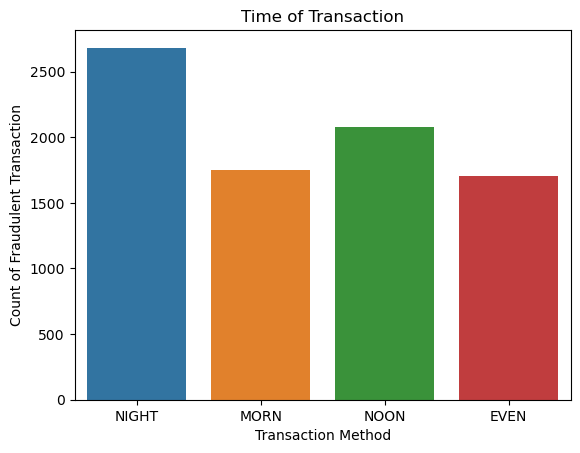

In [67]:
fraud_data = fraud_data.copy()  
fraud_data['hour'] = fraud_data['step'] - (24 * (fraud_data['step'] // 24))

# Label the 'hour' feature to 'NGHT', 'MRNG', 'DAY', and 'EVE'
fraud_data.loc[fraud_data['hour'] <= 7, 'time'] = 'NIGHT'
fraud_data.loc[((fraud_data['hour'] > 7) & (fraud_data['hour'] <= 12)), 'time'] = 'MORN'
fraud_data.loc[((fraud_data['hour'] > 12) & (fraud_data['hour'] <= 18)), 'time'] = 'NOON'
fraud_data.loc[((fraud_data['hour'] > 18) & (fraud_data['hour'] <= 23)), 'time'] = 'EVEN'
# Convert the 'time' column to a categorical variable with an ordered list
fraud_data.time = pd.Categorical(fraud_data.time, ['NIGHT', 'MORN', 'NOON', 'EVEN'])

print("Count of Transaction Method")
print(fraud_data['time'].value_counts())
sns.countplot(x='time', data=fraud_data)
plt.title('Time of Transaction')
plt.xlabel('Transaction Method')
plt.ylabel('Count of Fraudulent Transaction')
plt.show()

More fraud transactions are happening at night

#### Type of Transactions Used in Fraud Transaction

Count of Transaction Method
type
CASH_OUT    4116
TRANSFER    4097
CASH_IN        0
DEBIT          0
PAYMENT        0
Name: count, dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


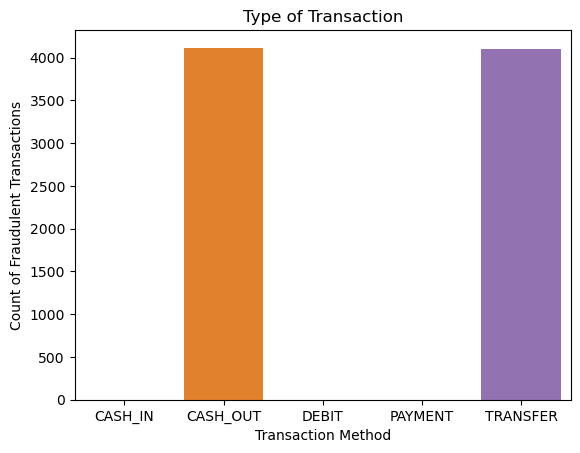

In [26]:
print("Count of Transaction Method")
print(fraud_data['type'].value_counts())
sns.countplot(x='type', data=fraud_data)
plt.title('Type of Transaction')
plt.xlabel('Transaction Method')
plt.ylabel('Count of Fraudulent Transactions')
plt.show()

Fraud Transactions are done through Cash out and Transfer

## Feature Engineering

#### Encoding categorical Variables

In [159]:
#is fraud, is flagged  are already in 0,1 form. so no label encoding needed
# One-Hot Encoding 
joined = pd.get_dummies(joined, columns=['type'], drop_first=False)


In [163]:
joined.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.639648,C1231006815,170136.0,160296.359375,M1979787155,0.0,0,0,False,False,False,True,False
1,1,1864.280029,C1666544295,21249.0,19384.720703,M2044282225,0.0,0,0,False,False,False,True,False
2,1,11668.139648,C2048537720,41554.0,29885.859375,M1230701703,0.0,0,0,False,False,False,True,False
3,1,7817.709961,C90045638,53860.0,46042.289062,M573487274,0.0,0,0,False,False,False,True,False
4,1,7107.770020,C154988899,183195.0,176087.234375,M408069119,0.0,0,0,False,False,False,True,False


#### Feature Selection

In [166]:
#namedest and nameorig removed at first because of non relevance
#removing least important features after feature importance for max accuracy
fin_data=joined.drop(['isFlaggedFraud','type_DEBIT','type_PAYMENT','type_CASH_IN','nameDest','nameOrig'], axis=1)

## Model

#### Splitting Data

In [168]:
# Defining Target and Feature Variables
X = fin_data.drop('isFraud', axis=1)  
y = fin_data['isFraud']

# Splitting into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Upsampling Due to Target Variable Being Minority (0.13%)

In [172]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

#### Training and Prediction

In [175]:
### Training Model
rf = RandomForestClassifier(class_weight='balanced', n_estimators=10, random_state=42)
rf.fit(X_resampled, y_resampled)

# Making Prediction
y_pred = rf.predict(X_test)

## Evaluation

#### confusion matrix

Confusion Matrix:
[[877443    504]
 [    92   1551]]


Text(70.72222222222221, 0.5, 'Actual Labels')

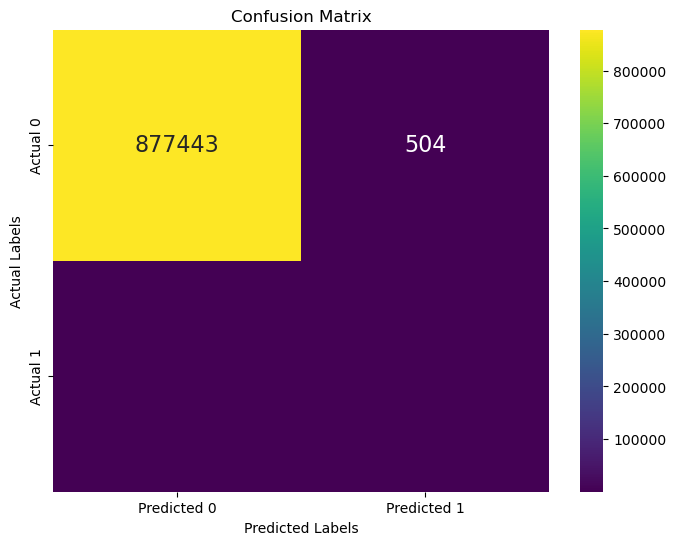

In [185]:
cm=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
#plotting
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'],annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

#### Classification Report

In [187]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    877947
           1       0.75      0.94      0.84      1643

    accuracy                           1.00    879590
   macro avg       0.88      0.97      0.92    879590
weighted avg       1.00      1.00      1.00    879590



#### Accuracy Score

In [189]:
 accuracy_score(y_test, y_pred)

0.9993224115781216

The model is 99.93% accurate

#### ROC-AUC

ROC-AUC: 0.9964822028664047


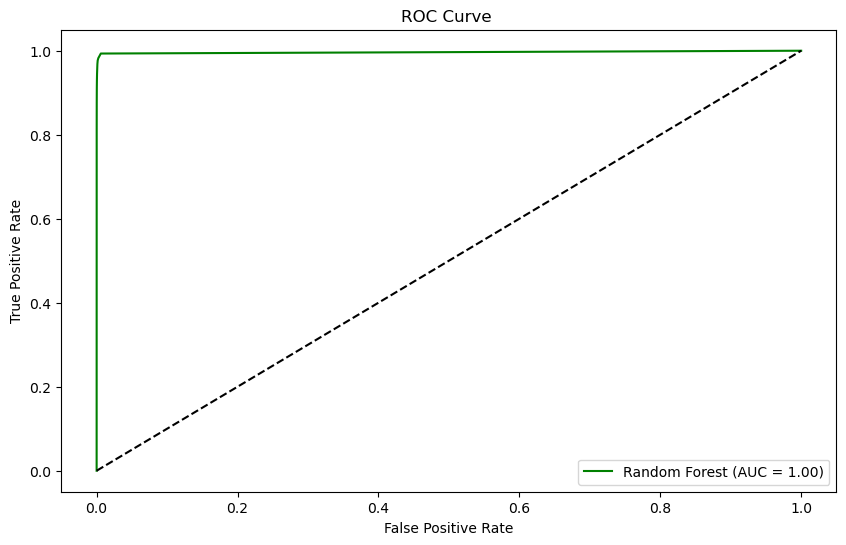

In [192]:
y_prob = rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
#plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='green', label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], color='black', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve ')
plt.legend(loc='lower right')
plt.show()

#### Feature Importance

Select and remove least important variables

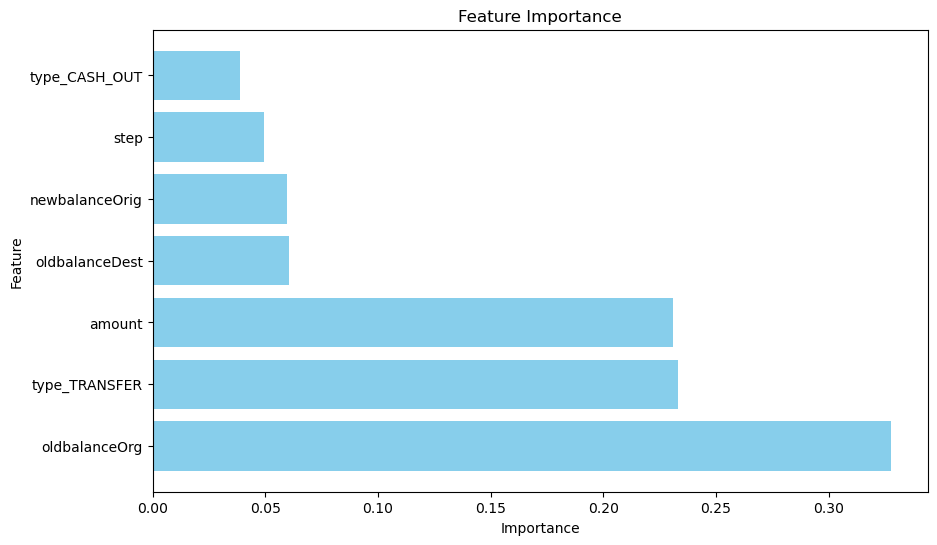

In [194]:
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

Now all features are important with old balance in origin account being most important

## Insights and Findings

1.Data Cleaning: Missing Values, Outliers, and Multi-Collinearity

  *Missing Values: Verified and handled missing values; none were found in the dataset.
  *Outliers: Outliers were identified and removed based on IQR. Fraudulent transaction values were excluded to maintain consistency as they contain anomalies.
  *Multi-Collinearity: Highly correlated features were observed and removed.


2.Fraud Detection Model 

The Random Forest Classifier was employed due to its robustness and ability to handle both numerical and categorical data. SMOTE was applied to balance the target variable classes, ensuring better representation of fraudulent transactions. A limited number of estimators (n_estimators=10) for faster processing.

3.Variable Selection

After training the model, feature importance revealed that the old balance in origin account was the most significant predictor, followed by account type and transaction amount, and least important features were removed for higher accuracy. Features like nameOrig, nameDest were excluded for irrelevance.


4.Model Performance

Confusion Matrix:
[[877443 504]
[ 92 1551]]

True Positives (Fraud Detected): 1551

True Negatives (Non-Fraud Detected): 877443

False Positives (Non-Fraud Incorrectly Flagged): 504

False Negatives (Fraud Missed): 92

Metric	Value	Description:

Precision	0.75	Indicates the proportion of true fraud cases among those flagged as fraud.
Recall 	0.94	Measures the ability to detect most of the fraud cases.
F1-Score	0.84	Harmonic mean of precision and recall, balancing both metrics.
ROC-AUC	0.9964	Reflects the model's ability to discriminate between fraud and non-fraud cases.

5.Key Factors Predicting Fraud

Old Balance in Origin Account
Amount transferred
Transaction Type

6.Do These Factors Make Sense?

Yes, the identified factors are consistent with patterns of fraudulent behaviour.
Old Balance in Origin Account: Most significant predictor of fraud, as fraudulent transactions often involve drastic balance reductions.
Amount: Larger transaction values are flagged as high-risk.
Transaction Type: Fraudulent activity is concentrated in Transfer and Cashout transactions.

7.Prevention Recommendations

*Real-Time Monitoring: Implement alerts for significant balance changes in origin accounts.
*Transaction Limits: Review and verify transactions exceeding a predefined threshold.
*Enhanced Verification: Focus on Transfer and Cashout transactions for additional scrutiny.
*Model Updates: Continuously train fraud detection models with updated data to capture evolving fraud patterns.